# DSCI 6003 6.2 Lecture - Gradient Boosting

## By the End of this Lecture You Will

1. Be more familiar with loss functions.
2. Be able to write down common loss functions.
3. Be able to describe in your own words the general Gradient Boosting algorithm.
4. Write the pseudocode for Gradient Boosting Regression Trees.

##  References
https://web.stanford.edu/~hastie/Papers/AdditiveLogisticRegression/alr.pdf   
https://statweb.stanford.edu/~jhf/ftp/trebst.pdf   
https://www.youtube.com/watch?v=wPqtzj5VZus - Trevor Hastie lecture on gbm

## Loss Functions - Regression and Classification

Loss functions are computationally feasible loss functions representing the price paid for inaccuracy of prediction.
They are quite literally invented, based upon the research and intuition of the investigators who developed them. Sound statistical practice requires selecting an estimator consistent with the  acceptable variation known in the context of an applied problem. Loss functions are selected based on apriori knowledge of the losses that will be experienced from being wrong. This usually amounts to a theoretical argument.


### Loss Functions for Classification

Classification and regression require different types of loss measures. In particular, classification loss for an individual point is characterized in terms of its a binary measure:

$$ l_i = y_i \cdot f(x_i)$$

Where it is defined that $f(x) \in \{-1,1\}$, a sort of raw binary output rather than specific class label (see the adaboost lecture for another example of this).  It is standard practice to discuss loss functions as functions of only one variable, in order for simplicity.

### 0-1 Function

The most natural selection for loss would be the 0-1 binary loss function, a function that scores 1 (loss) for an incorrect classification, and 0 for an correct classification. We can formulate it in terms of the [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function):

$$l(y_i, f(\theta,x_i)) = H(-y_i \cdot f(\theta,x_i))$$

However, 0-1 is computationally miserable to handle. It's not differentiable and constitutes a computationally intractable problem in terms of formulating a working solution. Instead we substitute surrogate functions that closely mimic the 0-1 function close to inflection points, but are differentiable and convex. (thus optimizable)

### Exponential Loss

This is the loss function that we use in discrete adaboost:

$$l(y_i, f(\theta, x_i)) = ln(1+e^{-y_i \cdot f(\theta,x_i)})$$


### Hinge Loss

The hinge loss is very popular and is the backbone of many linear models (like SVMs). It has a non-differentiable point at zero, but is differentiable everywhere else.

$$l(y_i, f(\theta, x_i)) = argmax(0,1-y_i \cdot f(\theta, x_i)) $$

$$\dfrac{\partial l(y_i, f(\theta, x_i))}{\partial \theta} = \begin{cases} -y_i \cdot f'(\theta,x_i) & y_i \cdot f(\theta, x_i) < 0\\
0 & \text{otherwise}\end{cases}$$

### Square Loss (also used for regression)

$$l(y_i, f(\theta, x_i)) = (1-y_i \cdot f(\theta, x_i))^2$$

The wikipedia page on classifier loss functions has a plot comparing these different functions. 

https://en.wikipedia.org/wiki/Loss_functions_for_classification



## Loss Functions for Regression

Loss functions for regression are often somewhat simpler than classification due to the fact that the models predict continuous values. 

### Square Loss (also used for regression)

$$l(y_i, f(\theta, x_i)) = (y_i - f(\theta, x_i))^2$$


### Absolute Error

$$l(y_i, f(\theta, x_i)) = |y_i - f(\theta, x_i)|$$


### Huber Loss

Where $\delta$ is an input value representing the slope of the loss function away from 0

$$l(y_i, f(\theta, x_i)) = \begin{cases} \dfrac{1}{2}(y_i - f(\theta, x_i))^2 &   |y_i - f(\theta, x_i)| \leq \delta \\
\delta|y_i - f(\theta, x_i)| - \dfrac{1}{2}\delta^2 & \text{otherwise}
\end{cases}$$



![loss funct regression](./images/loss_functions_regression.png)

## Ensemble Boosting as a Whole

So far you have learned the discrete adaboost algorithm for trees, but adaboost can be applied to any situation, given the correct cost function and implementation. In fact, a great deal of effort has gone into developing the mathematical foundation for a variety of ensemble boosting algorithms.


## General Adaboost

    Construct base learner F_0(theta, w, x, y)
    
    for t in (1,T):
        given current error weighting alpha, optimize weak learner h_t(theta, w, x, y)
        add to ensemble F_t = F_t-1 + alpha*h_t(theta, w, x, y)
        eps = (w[y' != y])/sum(q) (weights from the set of misclassified points)
        update error weighting for this tree, alpha = 0.5 * ln((1-eps)/eps))
        update weights w with loss function

Any learner (classifier or regressor) that produces a simple output of predictions can be employed this way, much like a random forest.

## General Gradient Boosting

Gradient Boosting, like Adaptive Boosting, is a technique that can easily be applied to any classifier or regressor. 

    Construct base learner of type f, F_0(theta, x, y) with loss function L(y, F(x))
    
    for t in (1,T):
        compute partial derivatives r' of loss function w.r.t. last learner, F_t-1 for all i: 1...n
        fit a weak learner on r': f_t(theta, x, r')
        find an optimum (lagrange) multiplier lambda on the loss function L(y, F_t-1 + lambda*f_t(theta, x, r'))
        add this learner to the new model: F_t = F_t-1 + lambda*f_t(theta, x, r')
   
The fundamental difference between gradient boosting and adaptive boosting is the fitting of subsequent stages of learners on the **gradient of the loss function**. Why?

The reasoning behind this is rather simple and hearkens back to basic calculus.

Suppose we are trying to make an estimate of the objective (loss plus regularization for model complexity) function $O$ at iteration t of the boost:

$$O_{t} = \sum_{i=1}^N L(y, F_{t-1}(x_i) + \lambda\ f_t(\theta, x_i, r')) + \Omega(f_t(\theta, x, r'))$$

Where the loss function is again $L$ and the complexity (regularization term) is $\Omega$. We take the Taylor expansion of a function f (any function, not just the weak learner) at two degrees of order:

$$f(x+\Delta\ x) \simeq f(x) + f'(x)\Delta x + \dfrac{1}{2}f''(x)\Delta x^2$$

About the previous estimator $F_{t-1}$:

$$L(y, F_{t-1}) + \partial_{F_{t-1}}L(y, F_{t-1})f_{t} + \dfrac{1}{2}\partial_{F_{t-1}}^2L(y, F_{t-1})f_{t}^2$$

Set 

$$ g_i = \partial_{F_{t-1}}L(y, F_{t-1}(x_i))$$

$$ h_i = \partial_{F_{t-1}}^2L(y, F_{t-1}(x_i))$$

This makes the first estimate of the objective function to be:

$$O_{t} = \sum_{i=1}^N [L(y, F_{t-1}(x_i)) + g_{i}f_t(x_i) + \dfrac{1}{2}h_{i}f_t(x_i)^2] + \Omega(h_t(\theta, x, r'))$$

This transformation benefits us because it has simplified the composite loss function in terms of an expansion of derivatives, which if we choose the right base loss function, can still be not too hard to find. Note that we also have to have the output of $f_t(x_i)$, the base learner, at this stage. 


## Gradient Boosted Regression Trees

In order to make the above equation meaningful for trees, we start with making the complexity function simpler:

$$\Omega(h_t(\theta, x, r')) = \gamma T + \dfrac{\lambda}{2} \sum_{j=1}^{T}w_j^2$$

Where $T$ is the height of the tree, and $w^2$ represents the score for the regression **coming from an individual leaf**. This changes the objective function to:

$$O_{t} = \sum_{i=1}^N [g_{i}f_t(x_i) + \dfrac{1}{2}h_{i}f_t(x_i)^2] + \gamma T + \dfrac{\lambda}{2}\sum_{j=1}^{T}w^2 + C$$

Where we now take the sum over all tree branches in each tree the component from evaluating the previous loss function at $t-1$ is held as a constant $C$. We also take the score from a leaf and set $f_t = w_t$.

$$O_{t} = \sum_{j=1}^{T}\sum_{i=1}^N [g_{i}w_j(x_i) + \dfrac{1}{2}(h_{i}+ \lambda)w_j(x_i)^2] + \gamma T + C$$

$$O_{t} = \sum_{j=1}^{T}[\sum_{i=1}^N g_{i}w_j(x_i) + \dfrac{1}{2}(\sum_{i=1}^N h_{i}+ \lambda)w_j(x_i)^2] + \gamma T + C$$

We can simplify these equations by counting up the derivatives over the set of datapoints belonging to that split in the leaf, called the *instance* $I$.

$$ G_j = \sum_{i=1}^{N_{I}} g_{i} $$

$$ H_j = \sum_{i=1}^{N_{I}} h_{i} $$

$$O_{t} = \sum_{j=1}^{T}[G_{j}w_j(x_i) + \dfrac{1}{2}(H_{j}+ \lambda)w_j(x_i)^2] + \gamma T + C$$

We need to find the optimal leaf score. Taking the first derivative of $O$ with respect to $w_j$ and setting to zero: 

$$\dfrac{\partial O_{t}}{\partial w_{j}} = \sum_{j=1}^{T}[G_{j} + (H_{j}+ \lambda)w_j(x_i)] = 0$$


$$\sum_{j=1}^{T}G_{j} =  -\sum_{j=1}^{T}(H_{j}+ \lambda)w_j(x_i)$$

Assuming the tree is built, we have a fixed structure at every point $t$, so we can write the *optimal leaf score* at every point j:

$$ w_{j}^{\dagger} = -\dfrac{G_{j}}{H_{j}+\lambda}$$

We can substitute $w_{j}^{\dagger}$ everywhere we see $w_j$ in the above equation to get an optimal objective function:
                                                 
$$O_{t}^{\dagger} = \sum_{j=1}^{T}[-\dfrac{G_{j}^2}{H_{j}+ \lambda} + \dfrac{1}{2}\dfrac{G_{j}^2}{H_{j}+ \lambda}] + \gamma T $$

$$O_{t}^{\dagger} = -\dfrac{1}{2}\sum_{j=1}^{T}\dfrac{G_{j}^2}{H_{j}+ \lambda} + \gamma T $$

Meaning that we need to find the minimum objective score that is a sum over all the leaves in the tree. This amounts to no more than a dynamic programming problem, wherein we need only find the best possible tree, optimizing the score of the leaf at every branch.

### In practice

In practice, this does not differ in any way from a regular tree. we grow the tree just as we would a standard regression tree, looking for the local optimum at each leaf. The information gain at each branch is computed from the partition, just as it would be in a regular decision tree, except that we use the $g_i$ and $h_i$ as above.

$$\text{Gain} = \dfrac{G_{L}^2}{H_{L}+\lambda}+\dfrac{G_{R}^2}{H_{R}+\lambda}-\dfrac{(G_{L}+G_{R})^2}{H_{L}+H_{R}+\lambda} - \gamma$$

Where $L$ is the partition of points in the left child, $H$ is the partition of points in the right child, and the latter term is the value of the score if we do not split. 

The current state-of-the-art loss function is Huber loss, discussed above.

### The GBRT algorithm

    Construct base tree F_0(theta, x, y) with loss function L(y, F(x))
    
    for t in (1,T):
        Compute partial derivatives g_t, h_t with the needed loss function
        Construct tree f_t optimizing the structure score at each split
        Prune tree as necessary
        find an optimum (lagrange) multiplier lambda that minimizes RMSD error
        add f_t to the new model: F_t = F_t-1 + lambda*f_t(theta, x, r')
   

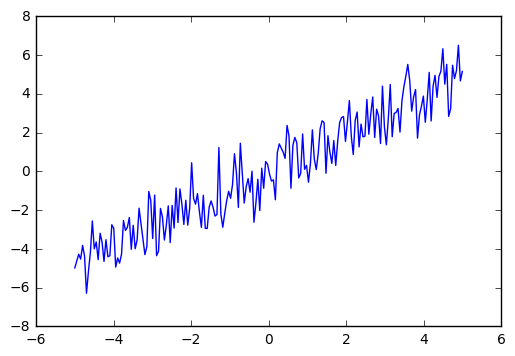

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-5.0, 5.0, 200).reshape(200,1)

y = x + np.random.normal(size=(200,1))

_ = plt.plot(x,y)
plt.show()
#print(x.shape, y.shape)

(200, 111)


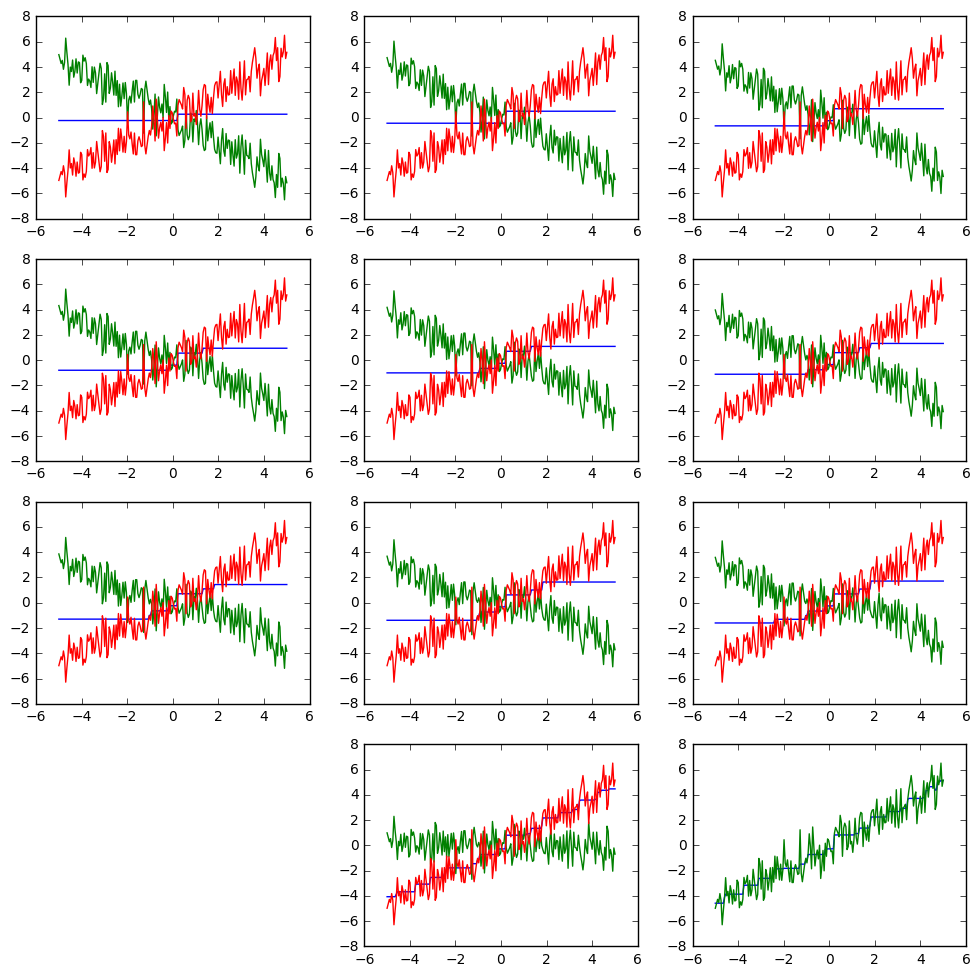

In [2]:
from sklearn import tree
#build first "model" - all zeros
m = np.zeros(200).reshape((-1,1))

models = m  #initialize a matrix that will accumulate the sequence of models
nTrees = 110  #number of trees to build for the ensemble

learnRate = 0.1  #gradient descent parameter

plt.figure(figsize = (12,12)) #setup for plotting each stage

for i in range(nTrees):
    grad = m - y  #expression for gradient for each input example 
    clf = tree.DecisionTreeRegressor(max_depth=1)  #instantiate stump
    clf = clf.fit(x, grad)  #train model to predict gradient
    yhat = clf.predict(x).reshape(-1,1)  #use model to generate predictions
    #print(yhat.shape)
    m = m - learnRate*yhat  #accumulate latest model into ensemble (diminished by learning rate)
    models = np.concatenate((models, m), axis=1)  #concatenate latest ensemble in order to plot stagewise

print(models.shape)
 
##final = models    
#_ = plt.plot(x,models[:,-1])
#_ = plt.plot(x,y)

#plt.show()

for ixx, ix in enumerate(np.arange(1,10,1).astype(int)):
    plt.subplot(4,3,ixx + 1)
    plt.plot(x,models[:,ix])
    plt.plot(x,models[:,ix - 1].reshape(-1,1) - y)
    plt.plot(x,y)

plt.subplot(4,3,11)
plt.plot(x,models[:,50])
plt.plot(x,models[:,49].reshape(-1,1) - y)
plt.plot(x,y)
    
plt.subplot(4,3,12)
_ = plt.plot(x,models[:,-1])
_ = plt.plot(x,y)
plt.show()
